# District Wise Infected Count

Click the {fa}`rocket` --> {guilabel}`Live Code` button above on this page, and run the code below.
In the frist attempt it might take some time to Binder to be "ready". If it's not repsonded click the button again.

In [4]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install ipywidgets

In [109]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import requests  # Import the requests library
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [61]:
from IPython.core.display import display, HTML
display(HTML("<style>.toggle-button { display :none !important; }</style>"))
display(HTML("<style>.toggle-button-hidden { display :none !important; }</style>"))
display(HTML("<style>.button.toggle-button  { display :none !important; }</style>"))
display(HTML("<style>.fas fa-download { display :none !important; }</style>"))


# Query URL
url = ('https://covid19-healthylk.herokuapp.com/api/districtstotal?startdate=2021-08-31&enddate=2021-09-31')
#print(url)
response = requests.get(url)  # Make a GET request to the URL
# Print status code (and associated text)
print(f"Data Request returned {response.status_code} : '{response.reason}'")
# Print data returned (parsing as JSON)
payload = response.json()  # Parse `response.text` into JSON


Data Request returned 200 : 'OK'


In [80]:
data=pd.json_normalize(payload['data'])
selected=data[["datetext", "counttext","location.formattedAddress"]]
print('Dataset feactched as selected dataframe')
#print(selected)
#list(selected.columns.values)

Dataset feactched as selected dataframe


In [124]:
filtedVals= selected[selected['location.formattedAddress'].str.contains('Nuwara Eliya, Sri Lanka')]
print('By defult Nuwara Eliya District selected')
print('For other district select it form the dropdown below >>>')



def f(x):
    print("District changed to %s" % x)
    filtedVals=selected[selected['location.formattedAddress'].str.contains(x)]
    print(filtedVals)
    pivoted = pd.DataFrame(filtedVals.pivot_table(values='counttext', index='datetext', columns='location.formattedAddress', aggfunc='sum'))
    return pivoted

#interact(f, x=['Nuwara Eliya, Sri Lanka', 'Badulla, Sri Lanka', 'Kurunegala, Sri Lanka']);



#def foo(param):
    #display(param)
    #return param
    #return pd.DataFrame({'Z':[param,param], 'A': ['b', 'b']})

params = widgets.Dropdown(options= ['Nuwara Eliya, Sri Lanka', 'Badulla, Sri Lanka', 'Kurunegala, Sri Lanka'])

#bar = widgets.interactive_output(foo, {'param' : params})


c = widgets.IntSlider()

ui = widgets.HBox([params])
def f2(params):
    #print((params))
    return params;

out = widgets.interactive_output(f2, {'params': params})

display(ui, out)


#display(widgets.VBox([params, bar]))

#display(ui, out)


By defult Nuwara Eliya District selected
For other district select it form the dropdown below >>>


Output()

By defult Nuwara Eliya District selected
For other district select it form the dropdown below >>>


Dropdown(description='District:', options=('Nuwara Eliya, Sri Lanka', 'Badulla, Sri Lanka', 'Kurunegala, Sri L…

District changed to Badulla, Sri Lanka


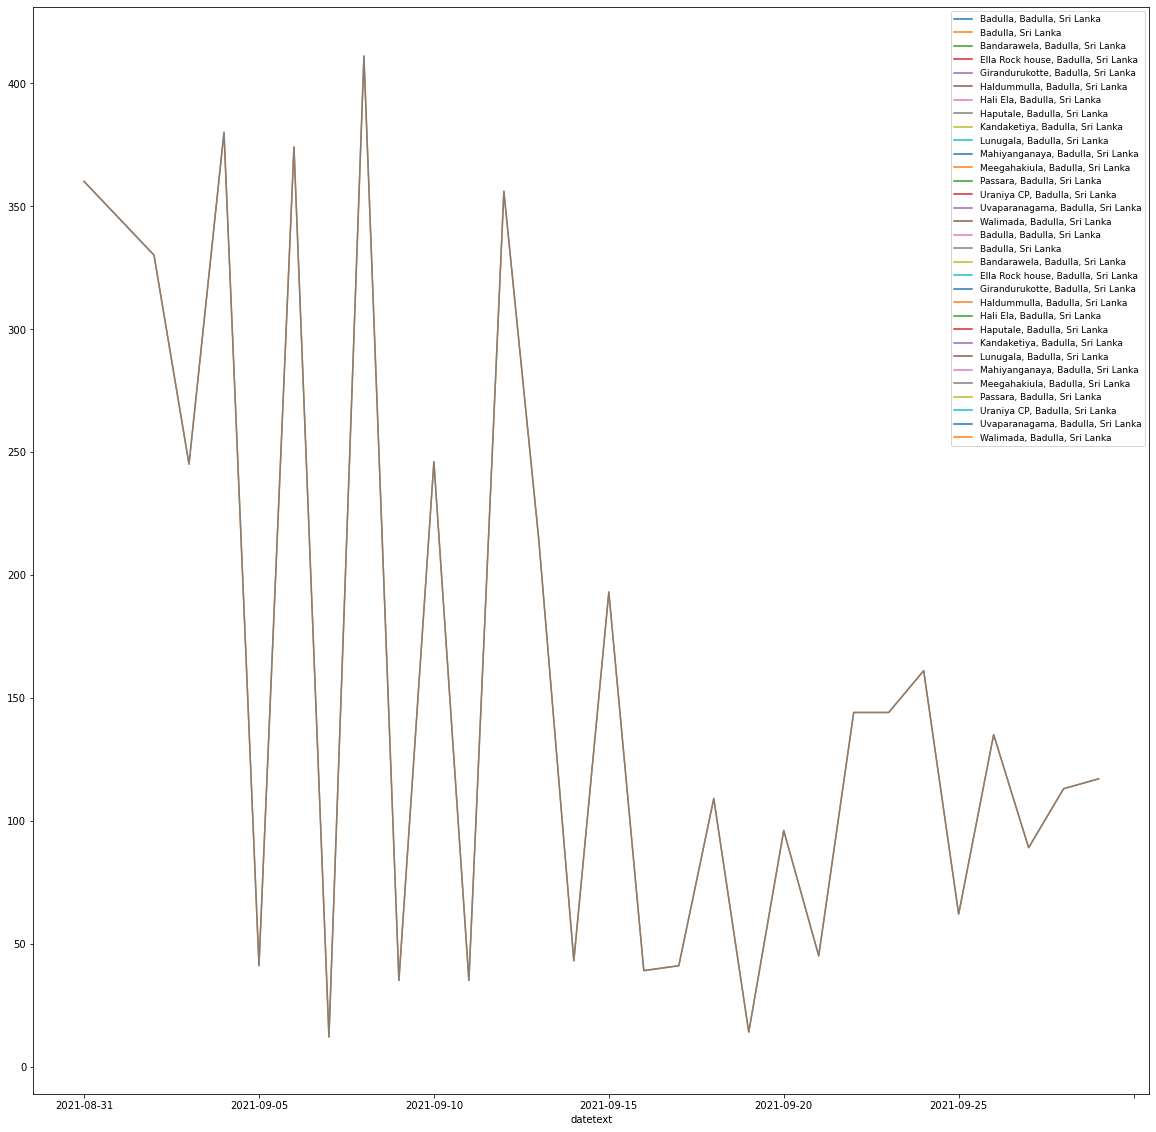

District changed to Nuwara Eliya, Sri Lanka


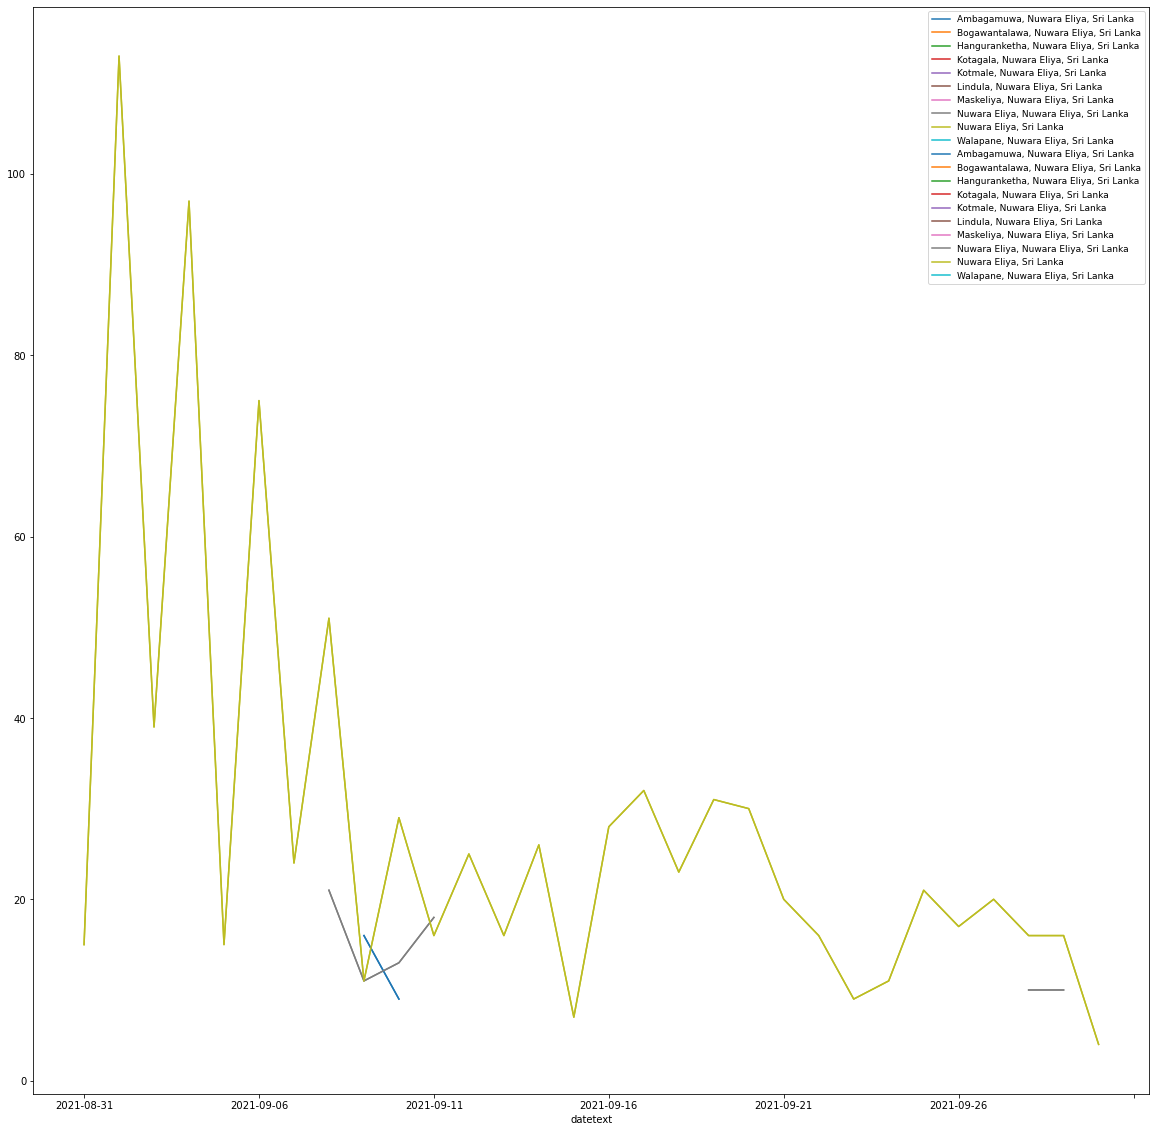

District changed to Kurunegala, Sri Lanka


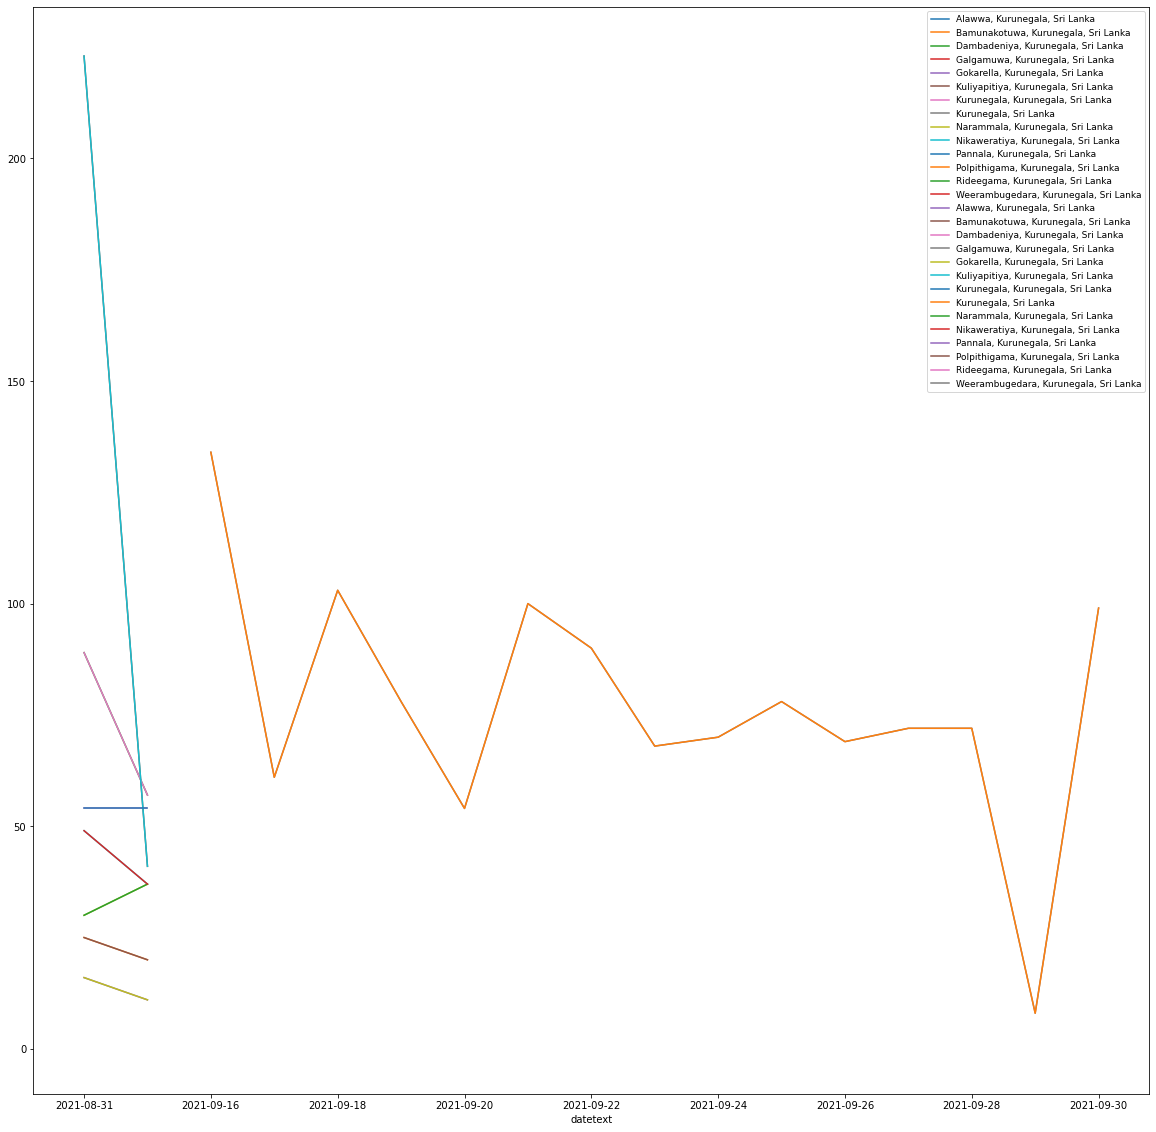

District changed to Kurunegala, Sri Lanka


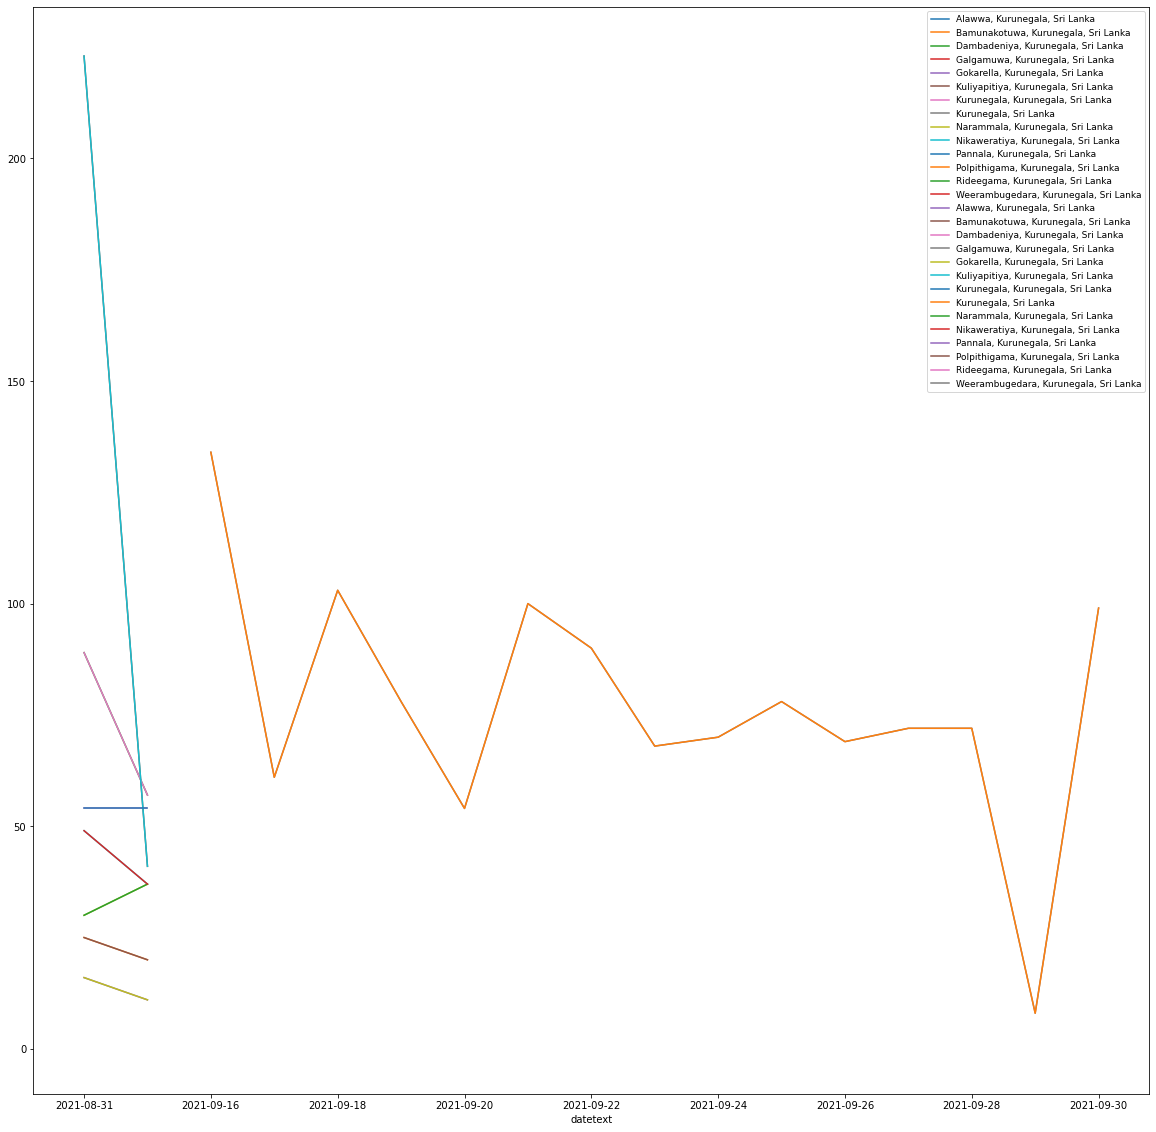

District changed to Badulla, Sri Lanka


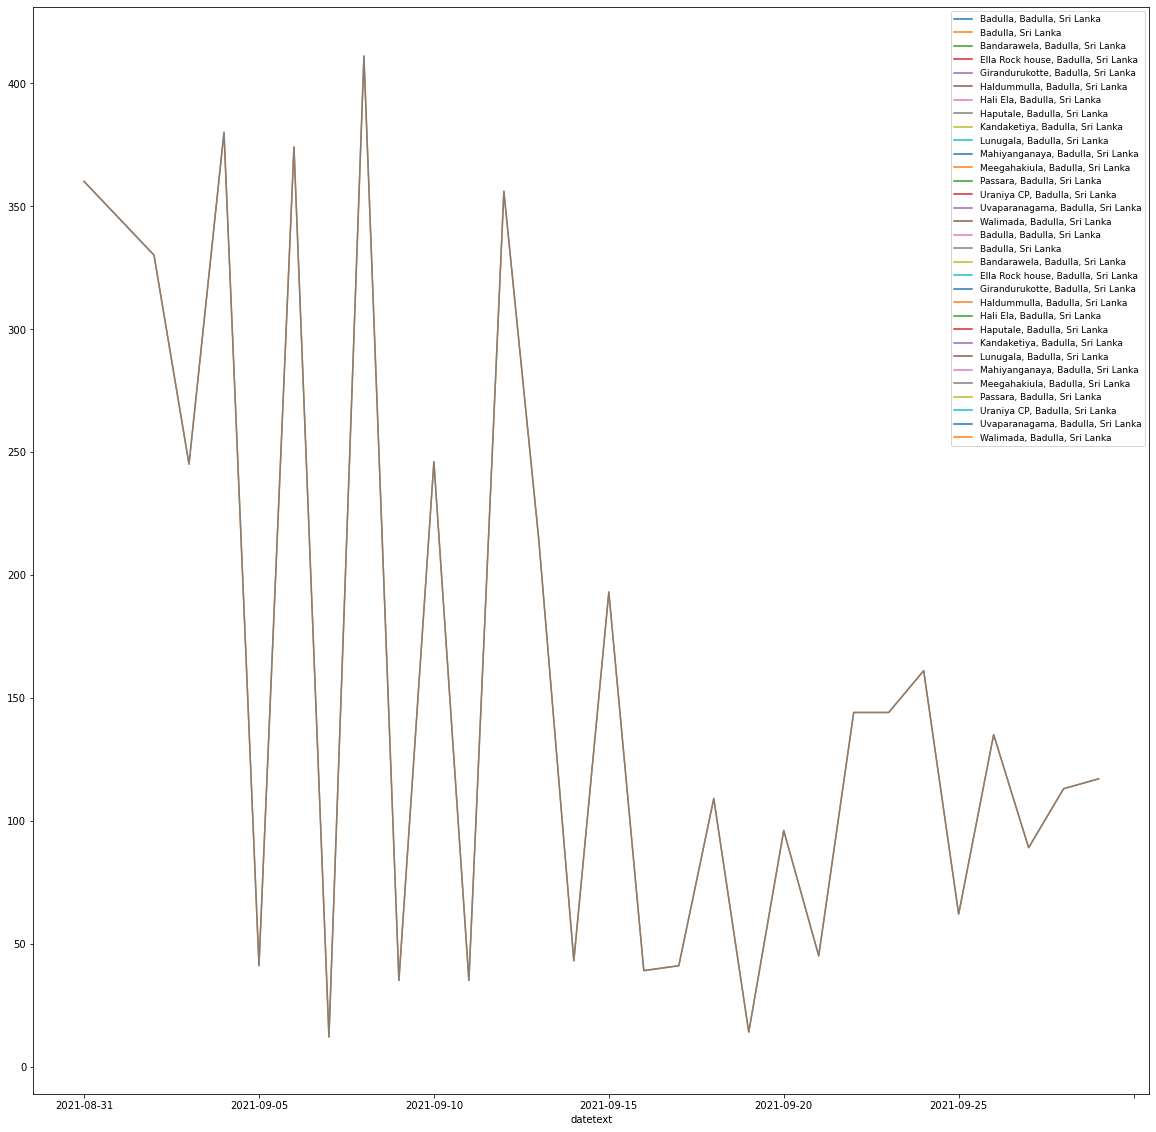

In [85]:
filtedVals= selected[selected['location.formattedAddress'].str.contains('Nuwara Eliya, Sri Lanka')]
print('By defult Nuwara Eliya District selected')
print('For other district select it form the dropdown below >>>')
#print(filtedVals)
w = widgets.Dropdown(
    options=['Nuwara Eliya, Sri Lanka', 'Badulla, Sri Lanka', 'Kurunegala, Sri Lanka'],
    value='Nuwara Eliya, Sri Lanka',
    description='District:',
)

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        print("District changed to %s" % change['new'])
        filtedVals=selected[selected['location.formattedAddress'].str.contains(change['new'])]
        #print(filtedVals)
        pivoted = pd.DataFrame(filtedVals.pivot_table(values='counttext', index='datetext', columns='location.formattedAddress', aggfunc='sum'))
        #print(list(pivoted.columns.values))
        #pivoted = pivoted.set_index('datetext')
        #print(pivoted)
        
        # figure size globally set for matplotlib
        mpl.rcParams['figure.figsize'] = (20, 20)
        mpl.rcParams['axes.grid'] = False

        ax = pivoted.plot()
        #ax.set_color_palette(sns.color_palette("muted"))
        pivoted.plot(ax=ax)
        plt.legend(loc='best',prop={'size': 9}) 
        plt.show() 

w.observe(on_change)

display(w)

In [95]:
import numpy as np
x = np.random.uniform(0, 5, size=100)
ep = np.random.normal(size=100)

y = 2*x + ep
x_values = np.linspace(0, 5, 1000)

def slope_viz(m=1):
    plt.scatter(x, y)
    plt.plot(x_values, m*x_values, lw=3, color='black')
    
    plt.ylim(-1.2, 12.2);

widgets.interact(slope_viz, m=[0, 1, 2, 3, 4]);

interactive(children=(Dropdown(description='m', index=1, options=(0, 1, 2, 3, 4), value=1), Output()), _dom_cl…

interactive(children=(Dropdown(description='x', options=('apples', 'oranges'), value='apples'), Output()), _do…